In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('C:/Sachin/Programs/Python for data analytics/Course+DataSet.csv',index_col='DATE',parse_dates=False)

In [4]:
df.head()

,Price
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


In [5]:
df.tail()

,Price
DATE,
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359
12-01-2017,114.7212
01-01-2018,129.4048


In [6]:
df.describe()

,Price
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [7]:
print(df.shape)

(397, 1)


In [8]:
df.size

397

<Axes: xlabel='DATE'>

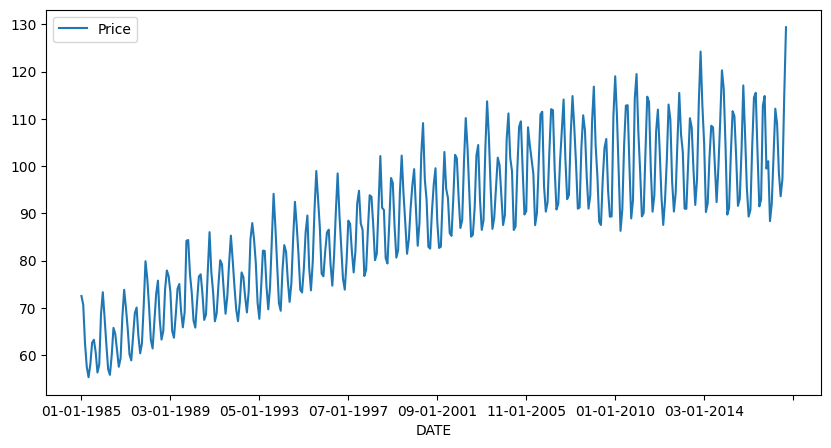

In [9]:
df.plot(figsize=(10,5))

In [10]:
start_date='01-01-1990'
end_date='01-01-2000'
timelim=(df.index >=start_date)&(df.index <end_date)
dataNew=df.iloc[timelim]

In [11]:
dataNew.head()

,Price
DATE,
01-01-1990,84.3598
01-01-1991,86.0214
01-01-1992,85.2855
01-01-1993,87.9464
01-01-1994,94.1386


In [12]:
dataNew.tail()

,Price
DATE,
01-01-1995,92.4532
01-01-1996,98.9732
01-01-1997,98.4613
01-01-1998,94.7920
01-01-1999,102.1348


<Axes: xlabel='DATE'>

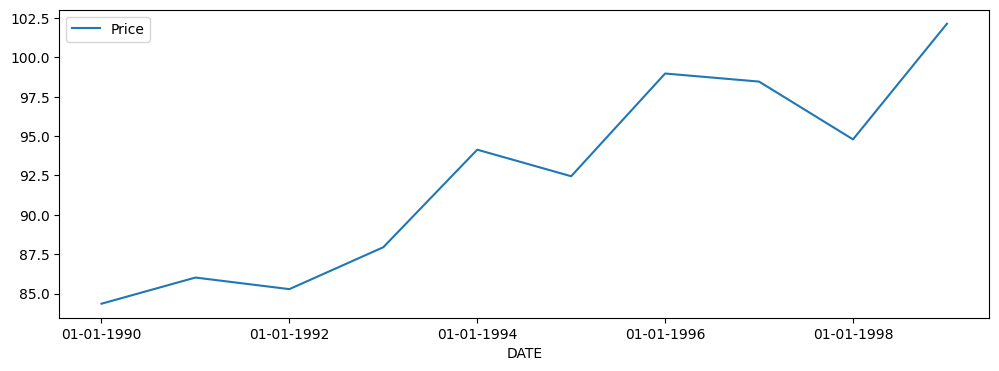

In [13]:
dataNew.plot(figsize=(12,4))

In [ ]:
DataQuarterly= df.rolling(window=8).mean()

<Axes: xlabel='DATE'>

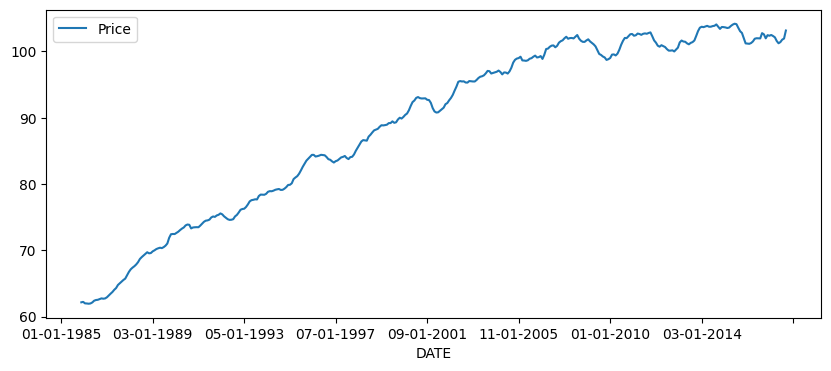

In [34]:
DataQuarterly.plot(figsize=(10,4))

In [31]:
DataQuarterly= df.rolling(window=12).mean()

<Axes: xlabel='DATE'>

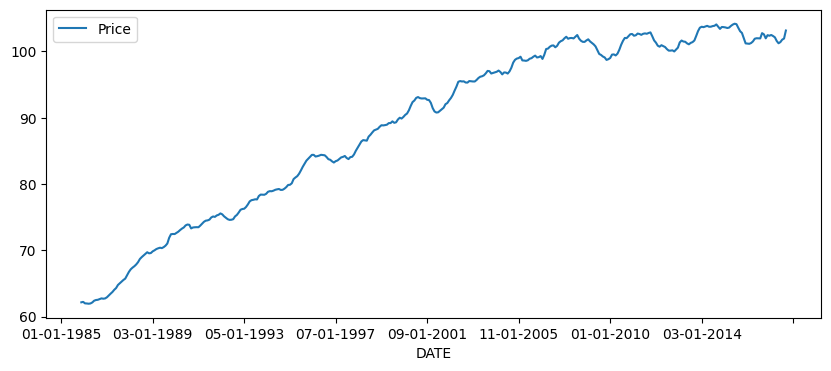

In [33]:
DataQuarterly.plot(figsize=(10,4))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

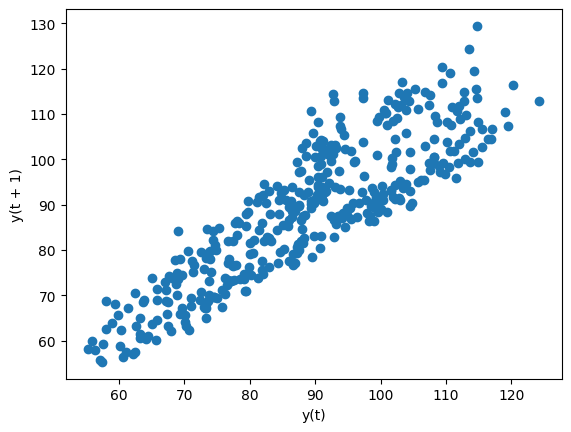

In [39]:
from pandas.plotting import lag_plot
lag_plot(df['Price'])